# Stock prediction 
---
* Laura Dahlberg, 2019-09-07


## Process
1. Frame the problem and proposed solution
1. Get data
1. Exploratory data analysis
1. Data cleaning / pre-processing
1. Train and test split
1. Model development
1. Model evaluation


## Frame the problem and proposed solution
---
The goal is to try three different models to predict stock price. The three different models we'll try are:
* Ridge regression
* Gradient Boosting Trees
* Lasso regression

We are going to start simple and use the open to predict the open. We'll use the open of the previous 28 days. 

Therefore my window size will be 28 days.

 Date range: 2014-09-07 to 2019-09-07

The data comes from  https://finance.yahoo.com/quote/NFLX/history?p=NFLX  



In [1]:
## importing needed libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import Ridge, Lasso

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

## evaluate models/evaluation metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error

## Get data

In [2]:
df = pd.read_csv('NFLX.csv')

In [3]:
# setting date as index
df.set_index('Date', inplace=True)

In [4]:
display(df.head())
display(df.info())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-08,67.771431,68.657143,67.742859,68.475716,68.475716,7668500
2014-09-09,69.471428,69.898575,68.057144,68.430000,68.430000,19737900
2014-09-10,68.599998,69.250000,68.148575,69.198570,69.198570,9104900
2014-09-11,68.938568,69.194283,68.524284,68.794289,68.794289,7865200
2014-09-12,69.092857,69.269997,68.017143,68.078575,68.078575,13425300


<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 2014-09-08 to 2019-09-06
Data columns (total 6 columns):
Open         1259 non-null float64
High         1259 non-null float64
Low          1259 non-null float64
Close        1259 non-null float64
Adj Close    1259 non-null float64
Volume       1259 non-null int64
dtypes: float64(5), int64(1)
memory usage: 68.9+ KB


None

## Exploratory data analysis


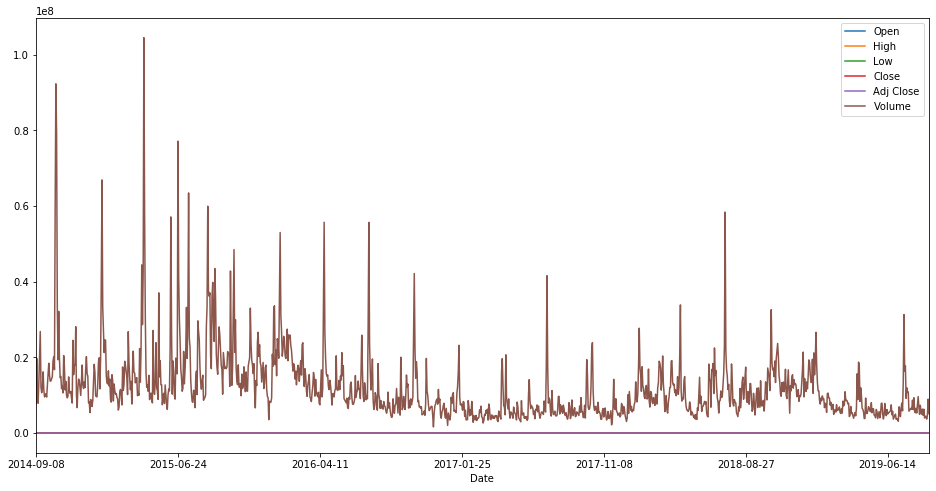

In [5]:
# Visualizing data
df.plot(figsize=(16,8))

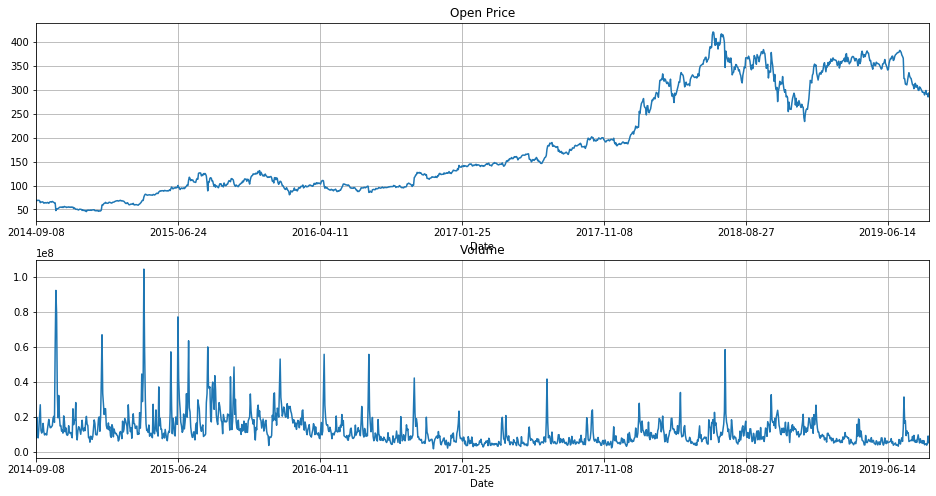

In [6]:
fig, axs = plt.subplots(2,1)
df['Open'].plot(ax = axs[0],
                     label='NFLX', 
                     figsize=(16,8), 
                     title='Open Price', 
                     grid=True)


df['Volume'].plot(ax = axs[1], 
                  label='NFLX',
                  figsize=(16,8),
                  title='Volume',
                  grid=True)

## Data cleaning / pre-processing


In [7]:
## defining window size
window_size = 28 

## preparing data so that we have 28 day windows and predicgt what 
## the next day's low should be

## Get the indices of access for the data
num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

In [8]:
## creates the 2D matrix of training samples
data = df['Open'].values[indices]

## Create train test splits

In [9]:
## Each row represents 28 days in the past
x = data[:,:-1]

## each output value represents the 28th day
y = data[:,-1]

In [10]:
## train and test split
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [11]:
# benjamin dahlberg

## Model development
---
* clean data (missing, cleaning, correcting, selecting)
* split the data between train & test, sometime validation (or k-fold cross validation)
```
train_test_split()
```
* initialize a model
* train model
* test model
* evaluate model
* improve model 
  * more/better features
  * hyperparameters
* compare models
* strategy for application (best model, voting, etc.)

### METHOD #1 [RIDGE REGRESSION](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)



In [12]:
## train
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

## infer
y_pred_train_ridge = ridge_model.predict(x_train)
y_pred_ridge = ridge_model.predict(x_test)

In [13]:
# what are the lengths of each part?
print(len(df))
print(len(y_pred_train_ridge))
len(y_pred_ridge)

1259
984


247

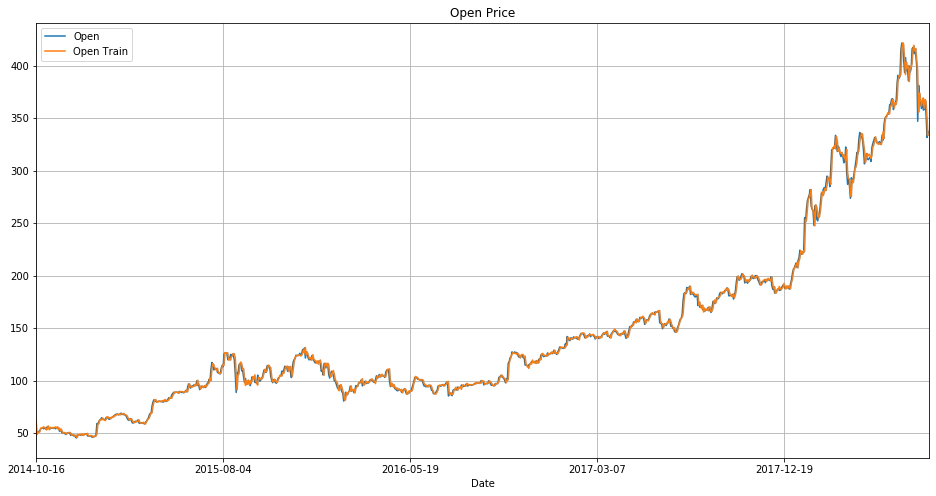

In [14]:
## plot what it looks like for the training data
df_ridge = df.copy()
## dropping/getting rid of the columns that I don't need
df_ridge.drop(['Low', 'High', 'Close', 'Adj Close', 'Volume'],
             axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size:ind_split]
df_ridge['Open Train'] = y_pred_train_ridge[:-window_size]
df_ridge.plot(label='NFLX', 
              figsize=(16,8), 
              title='Open Price', 
              grid=True)

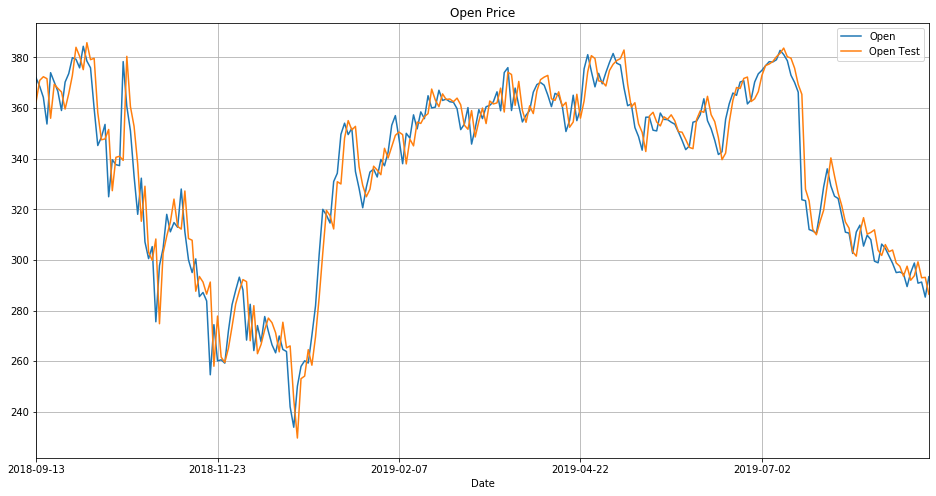

In [15]:
## repeat for the test
df_ridge = df.copy()
df_ridge.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'],
             axis=1, inplace=True)
df_ridge = df_ridge.iloc[ind_split + window_size:]
df_ridge['Open Test'] = y_pred_ridge
df_ridge.plot(label='NTFX', figsize=(16,8),
             title='Open Price',
             grid=True)

In [16]:
# evaluate w/ numbers
print('explained variance',explained_variance_score(y_test, y_pred_ridge))
print('mean squared error',mean_squared_error(y_test, y_pred_ridge))
print('mean absolute error',mean_absolute_error(y_test, y_pred_ridge))

explained variance 0.9257480689269815
mean squared error 97.02225991085099
mean absolute error 7.161647042648993


### METHOD #2 GRADIENT BOOSTING TREES

In [17]:
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)

#infer
y_pred_train_gb = gb_model.predict(x_train)
y_pred_gb = gb_model.predict(x_test)

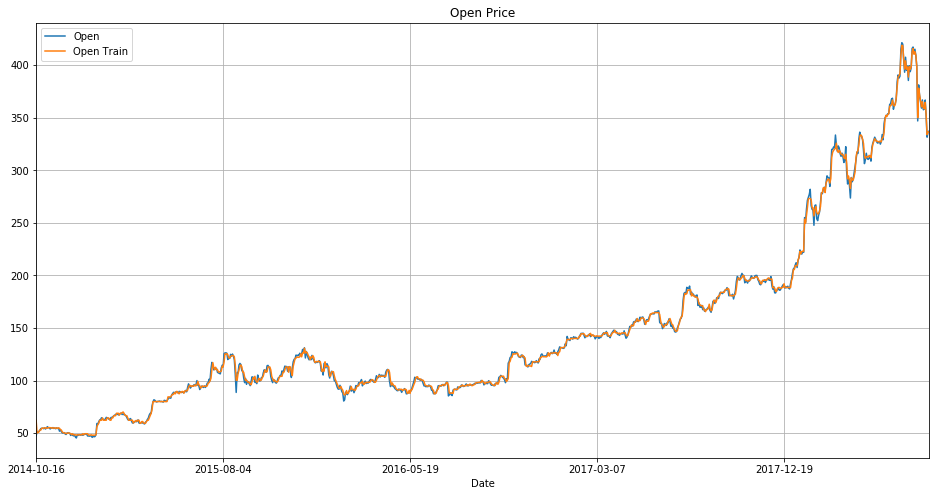

In [18]:
## plot what it looks liek for the training data
df_gb = df.copy()
df_gb.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)
df_gb = df_gb.iloc[window_size:ind_split]
df_gb['Open Train'] = y_pred_train_gb[:-window_size]
df_gb.plot(label='NTFX', 
           figsize=(16,8),
          title='Open Price',
          grid=True)

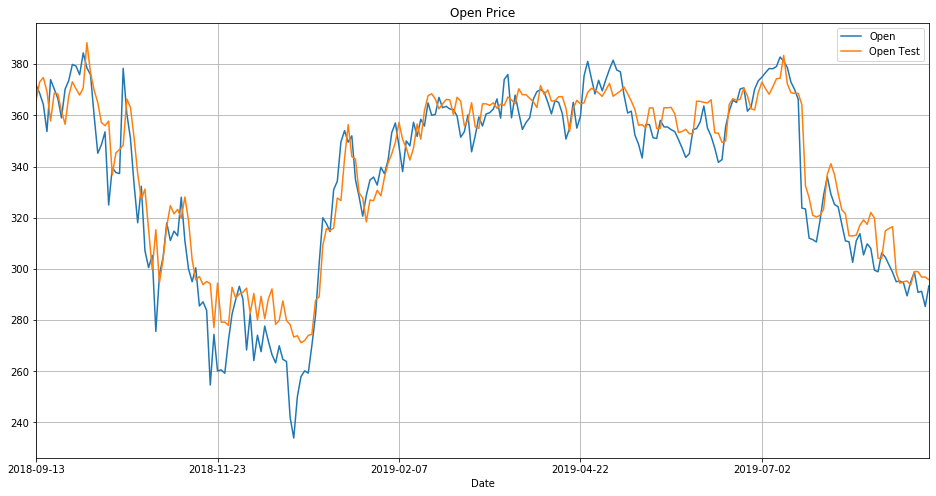

In [19]:
## repeating for the test
df_gb = df.copy()
df_gb.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)
df_gb = df_gb.iloc[ind_split + window_size:]
df_gb['Open Test'] = y_pred_gb
df_gb.plot(label='NTFX',
           figsize=(16,8),
           title='Open Price',
           grid=True)

In [20]:
# evaluate w/ numbers
print('explained variance',explained_variance_score(y_test, y_pred_gb))
print('mean squared error',mean_squared_error(y_test, y_pred_gb))
print('mean absolute error',mean_absolute_error(y_test, y_pred_gb))

explained variance 0.9126730996034783
mean squared error 131.40104219945158
mean absolute error 8.620640343480398


### METHOD #3: lasso

In [21]:
## train
lasso_model = Lasso(alpha=1, max_iter=2000)
lasso_model.fit(x_train, y_train)

## infer
y_pred_train_lasso = lasso_model.predict(x_train)
y_pred_lasso = lasso_model.predict(x_test) ## this are the guesses for "y"


In [22]:
## lasso_model.get_params()

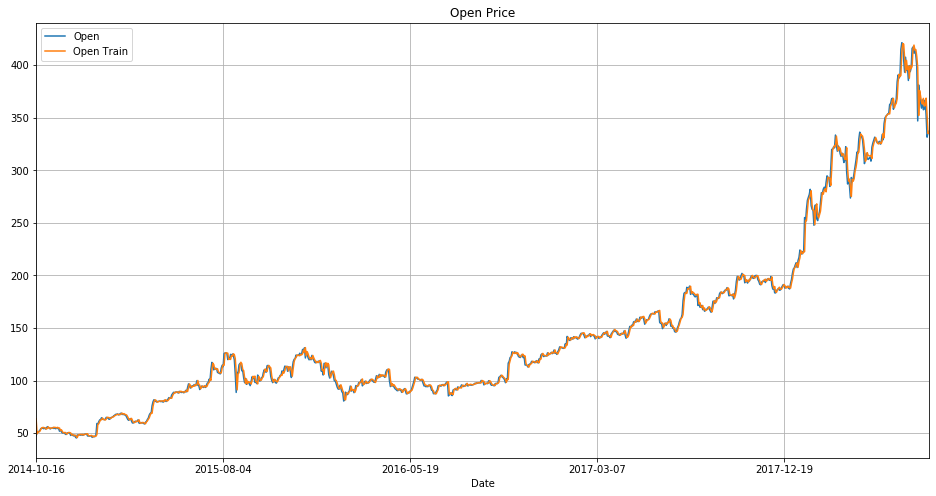

In [23]:
## plot what it looks like for the training data

## just keeping the column we need
df_lasso = df[['Open']].copy()

df_lasso = df_lasso.iloc[window_size:ind_split]
df_lasso['Open Train'] = y_pred_train_lasso[:-window_size]
df_lasso.plot(label='NFLX',
              figsize=(16,8),
             title='Open Price',
             grid=True)

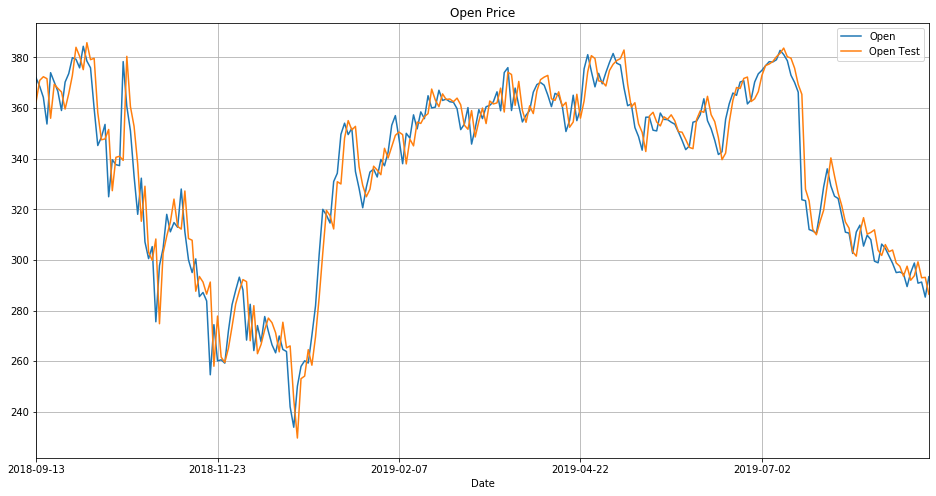

In [24]:
## repeat for the test

## keeping just the column we need
df_lasso = df[['Open']] .copy()

df_lasso = df_lasso.iloc[ind_split + window_size:]
df_lasso['Open Test'] = y_pred_ridge
df_lasso.plot(label = 'NFTX',
             figsize = (16,8),
             title = 'Open Price',
             grid = True)


In [25]:
# evaluate w/ numbers
print('explained variance',explained_variance_score(y_test, y_pred_lasso))
print('mean squared error',mean_squared_error(y_test, y_pred_lasso))
print('mean absolute error',mean_absolute_error(y_test, y_pred_lasso))

explained variance 0.93151269591962
mean squared error 89.58640592506903
mean absolute error 7.018011269775389


## Models comparison


Comparing all three models, we can see that they look close. 

By all three metrics it seems that Gradient Boost has the poorest results. Ridge and Lasso were pretty close, but Ridge performed a little bit better as it gave us a slightly lower error score

| Metric | Ridge | Gradien Boosting | Lasso |
| :--- | :--- | :--- | :--- |
| Expl variance | 0.940 | 0.915 | 0.940 |
| mean Sq error | 77.377 | 126.175 | 77.59 |
| mean abs error | 6.622 | 8.769 | 6.675 |
       


## Resources
---
* [sklearn Generalized Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)
* [sklearn Regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
* [sklearn LASSO regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)
* [sklearn RIDGE regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
